#Setup


In [87]:
# !pip install --user --upgrade scikit-learn==0.24
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.0.


In [88]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sb

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#Get the data


Data Description

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

Source: https://www.kaggle.com/prasadperera/the-boston-housing-dataset/data?select=housing.csv

In [89]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [90]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

#Data Analysis

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [92]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [93]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


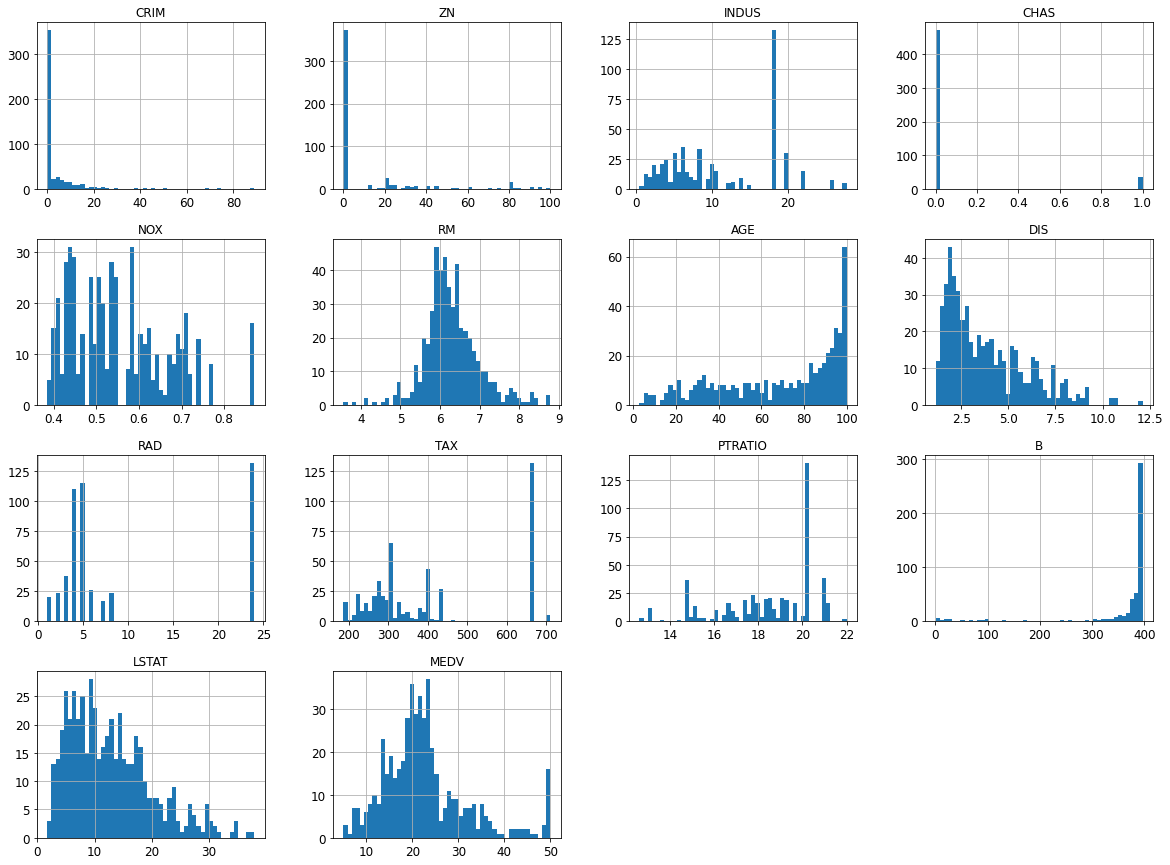

In [94]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

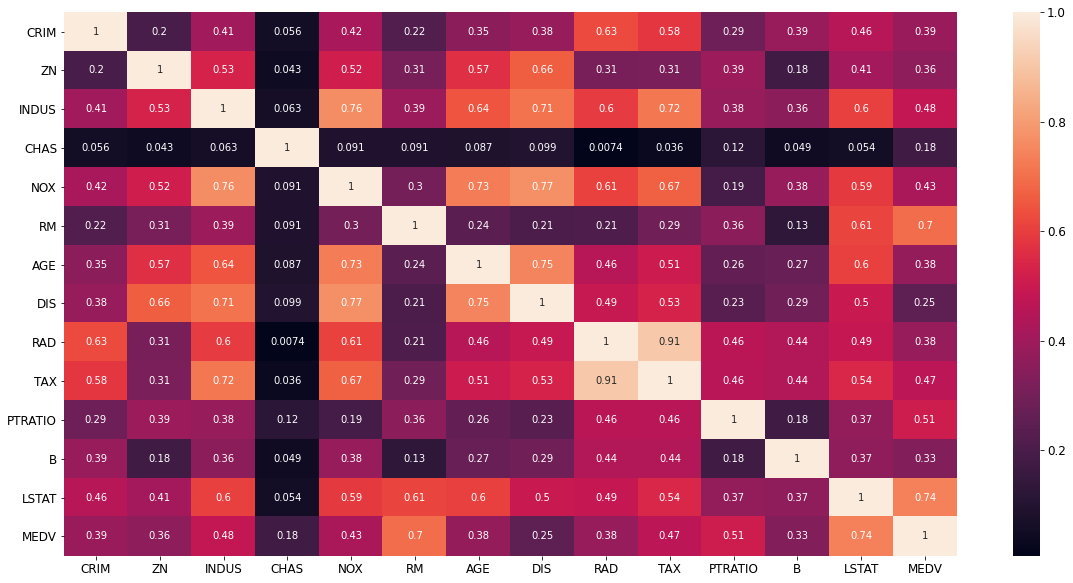

In [95]:
plt.figure(figsize=(20, 10))
sb.heatmap(data.corr().abs(),  annot=True)

#Data Preprocessing

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8);

In [98]:
stdScaler = StandardScaler()
X_train_scaled = stdScaler.fit_transform(X_train)
X_train_scaled

array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.48463784,
         0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ...,  0.33649132,
         0.20501196, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.84958414,
         0.36660893, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ..., -0.30216469,
         0.40342278, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.25654641,
         0.38343489,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.84958414,
         0.43041207,  0.27212814]])

#Model Training

In [117]:
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR, SVR

##ElasticNet

In [100]:
parameters = {'l1_ratio':[.1, .5, .7, .9, .95, .99, 1], 'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100]}
el_net = ElasticNet(random_state=0)
el_net_gscv = GridSearchCV(estimator=el_net, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [101]:
el_net_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=0), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [102]:
print(el_net_gscv.best_estimator_)
print(el_net_gscv.best_score_)

ElasticNet(alpha=0.0001, l1_ratio=0.1, random_state=0)
-21.396419889972137


##SVM
---



###Linear

In [103]:
parameters = {'loss':['squared_epsilon_insensitive'], 'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
lin_svr = LinearSVR(dual=False, random_state=0)
lin_svr_gscv = GridSearchCV(estimator=lin_svr, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [104]:
lin_svr_gscv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(dual=False, random_state=0), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000],
                         'loss': ['squared_epsilon_insensitive']},
             scoring='neg_mean_squared_error')

In [105]:
print(lin_svr_gscv.best_estimator_)
print(lin_svr_gscv.best_score_)

LinearSVR(C=1, dual=False, loss='squared_epsilon_insensitive', random_state=0)
-21.3951946929628


###Nonlinear

In [106]:
parameters = [{'kernel':['poly'],    'C':[0.001,0.01,0.1,1,10,100,300], 'degree':[2,3,4,5,6,7,8]},
              {'kernel':['rbf'],     'C':[0.001,0.01,0.1,1,10,100,300]},
              {'kernel':['sigmoid'], 'C':[0.001,0.01,0.1,1,10,100,300]}
              ]
nlin_svr = SVR()
nlin_svr_gscv = GridSearchCV(estimator=nlin_svr, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error', verbose=3)

In [107]:
nlin_svr_gscv.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 300],
                          'degree': [2, 3, 4, 5, 6, 7, 8], 'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 300],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 300],
                          'kernel': ['sigmoid']}],
             scoring='neg_mean_squared_error', verbose=3)

In [108]:
print(nlin_svr_gscv.best_params_)
print(nlin_svr_gscv.best_score_)

{'C': 100, 'kernel': 'rbf'}
-10.40230370341759


##Random Forest

In [109]:
parameters = {'max_leaf_nodes':[10,20,40,50,70, 90, 100, 120, 140, 160, 180, 200, 240]}
rf = RandomForestRegressor(random_state=0)  
rf_gscv = GridSearchCV(estimator=rf, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [110]:
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_leaf_nodes': [10, 20, 40, 50, 70, 90, 100, 120,
                                            140, 160, 180, 200, 240]},
             scoring='neg_mean_squared_error')

In [111]:
print(rf_gscv.best_estimator_)
print(rf_gscv.best_score_)

RandomForestRegressor(max_leaf_nodes=200, random_state=0)
-10.573596204013189


##Extra-Trees

In [112]:
parameters = {'max_leaf_nodes':[10,20,40,50,70, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]}
et = ExtraTreesRegressor(random_state=0)  
et_gscv = GridSearchCV(estimator=et, param_grid=parameters, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

In [113]:
et_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_leaf_nodes': [10, 20, 40, 50, 70, 90, 100, 120,
                                            140, 160, 180, 200, 220, 240, 260,
                                            280, 300]},
             scoring='neg_mean_squared_error')

In [114]:
print(et_gscv.best_estimator_)
print(et_gscv.best_score_)

ExtraTreesRegressor(max_leaf_nodes=240, random_state=0)
-7.020912432394004


##Gradient Boosting

In [157]:
parameters = {'n_estimators':[400,450,500], 'max_depth':[2,3,4], 'learning_rate' : [0.1, 0.05]}
gb = GradientBoostingRegressor(random_state=0, loss='ls')  
gb_gscv = GridSearchCV(estimator=gb, param_grid=parameters,  n_jobs=-1, cv=10, scoring='neg_mean_squared_error', verbose=3)

In [158]:
gb_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [2, 3, 4],
                         'n_estimators': [400, 450, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [159]:
print(gb_gscv.best_params_)
print(gb_gscv.best_score_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 400}
-7.807693552497399


#Model Selection and Final Evaluation

In [164]:
from sklearn.metrics import mean_squared_error

In [182]:
best_model = gb_gscv.best_estimator_

In [183]:
y_pred = best_model.predict(X_test)

In [184]:
mean_squared_error(y_test, y_pred)

15.999695002690785